# Are company trainings worthwhile? A look at their impact on training and engagement. 

I'm sure we can all relate to exceptional dullness of those old school workplace trainings, typically required on the first day of a new job. They're usually related to policy, look like they were filmed in the 1980s and tend to aggressively apply awful alliteration. Now, don't get me wrong, I love a bit of nostalgia, but do they really do anything? Surely, corporate trainings must have some benefit, especially if they're job relevant and not just busy-work on your first day, right?

Well, let's make a quick distinction: I'm sure you could put a solid ROI on the compliance trainings, these limit liabilitis and probably save most companies quite a bit in the long-term. But what about trainings geared towards employee development and growth?

In theory, these trainings should result in new skills, awareness of current trends in a given field, increased expsoure to the business for employees outside of operations and even networking/collaboration opportunities.
In terms of measureable impacts, these trainings should positively impact an individual's performance (again, theoretically). If nothing else, they should give employees a sense of growth and positively impact engagement. I'm going to test this to see what impact, if any, a company training has on these two metrics.

https://www.kaggle.com/datasets/jash312/hr-employee-attrition-datasets?resource=download&select=HR+Employee+data.csv


In [9]:

import pandas as pd ### Starting off by pulling in Pandas (i.e "ol' reliable") as I know I'll need it, along with Numpy and Matplot 
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv(r"C:\Users\Ian\Desktop\HR Employee data.csv")

In [10]:
df.columns

Index(['EmployeeID', 'JoiningYear', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'LeavingYear', 'Reason', 'RelievingStatus', 'office_code',
       'JobLevel_updated'],
      dtype='object')


## First Look

I'm starting off by looking through the columns; I already know there are several I don't need and I'd like to keep the dataframe organized. There are quite a few, many of which could be interesting to include in the analysis. However, to avoid the rabbit hole of scope creep and for the purposes of this analysis, I'll stick with a few basic ones:
1. Job Satisifaction and JobInvolvement - I'm assuming these are self-reported figures from an employee survey. Though not specifically called out as measures of engagement in the dataset's Kaggle page, both are elements of employee engagement. As such, I will use them as a proxy for engagement in the form of a new variable.

2. PerformanceRating - This will be used as a performance indiactor. Although it is likely based on managers' subjective assessments of their direct reports, it does serve as a standardized scale for cross-departmental comparison.
3. TrainingTimesLastYear - This is my training variable. 
4. Joblevel_updated - This may be useful, I may want to segment by job level. It's fair to assume that even though there's a universal rating scale across the company, an executive would not be evaluated on the same criteria as an entry-level employee. 

In [11]:
df = pd.concat([df["JobSatisfaction"], df["JobInvolvement"], df["PerformanceRating"],df["TrainingTimesLastYear"], df["JobLevel_updated"]], axis = 1)
df.describe()

,JobSatisfaction,JobInvolvement,PerformanceRating,TrainingTimesLastYear
count,13423.000000,13423.00000,13423.000000,13423.000000
mean,2.388214,2.46316,3.108247,2.454518
std,0.956279,0.66039,0.667023,1.069622
min,1.000000,1.00000,1.000000,0.000000
25%,2.000000,2.00000,3.000000,2.000000
50%,2.000000,3.00000,3.000000,2.000000
75%,3.000000,3.00000,3.000000,3.000000
max,4.000000,4.00000,5.000000,6.000000


Based on the above, there are a few things that stand out:
1. The engagement scores (i.e., "JobSatisifaction" and "JobInvolvement") are on a scale of 1-4. This response scale isn't unheard of, but it does limit how much flexibility survey respondents have when answering the question. By including an even-numbered response scale there's no middle ground. It effectively makes the options "Good" (3-4) and "Bad" (1-2).
1. It looks like the vast majority of employees have a performance rating of 3 out of 5. In my experience, this heavy centrality is common in large companies, which you'd expect to a certain extent, but we can see there's very little deviation from that. In fact, you could almost consider ratings of 1, 2, 4, and 5 to be outliers. 
2. It also looks like the majority of employees have had some type of training. 


Ok, so now that I've got my data set I can get into some analyses. As a reminder, I'm testing two different hypotheses:
a. Employees with a higher number of trainings in the past year should have, on average, higher performance ratings.
b. Employees with a higher number of trainings in the past year should have, on average, higher engagement scores.

However, before I get into the testing, I'll want to make sure I'm working with some normally distributed data. 

# Performance and Training: Testing for Normality

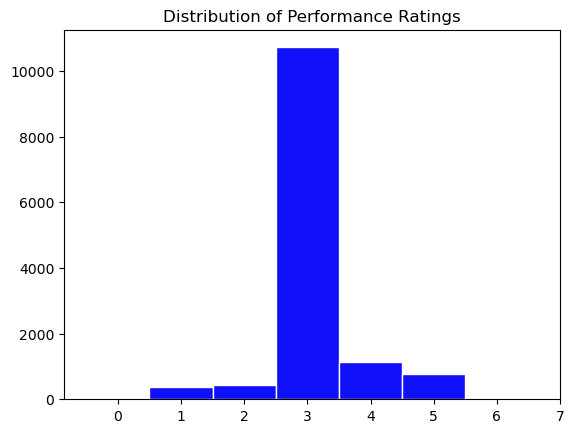

In [12]:
bins = np.arange(8) - 0.5                        ### Starting off with just a visual inspection of the distribution 
plt.hist(df["PerformanceRating"], 
         bins, color = "#0F0FF9", 
         edgecolor = "white")
plt.title("Distribution of Performance Ratings")
plt.xticks(range(8))

plt.show()

If you've ever googled "leptokurtic distribution" then the chart from above probably looks familiar. Just to be thorough, I'll test for normality.

I can try to apply a transformation as well, but with this level of excess kurtosis, the disribution is unlikely to be very malleable. 


In [13]:
def nor(var): #Using a custom fuction for normality testing. I'll be testing this at least a couple times and I like a consistent and unambiguous output.  
    test = stats.normaltest(var)
    if (test.pvalue<=.05):
        print(" p-value =", test.pvalue, "\n","This is a non-normal distribution")
    else:
        print("p-value =", test.pvalue, "\n", " .01, this is a normal distribution" )

In [15]:
from scipy import stats
nor(df["PerformanceRating"]) ### Not normal, not suprised.

 p-value = 0.0 
 This is a non-normal distribution


 p-value = 0.0 
 This is a non-normal distribution


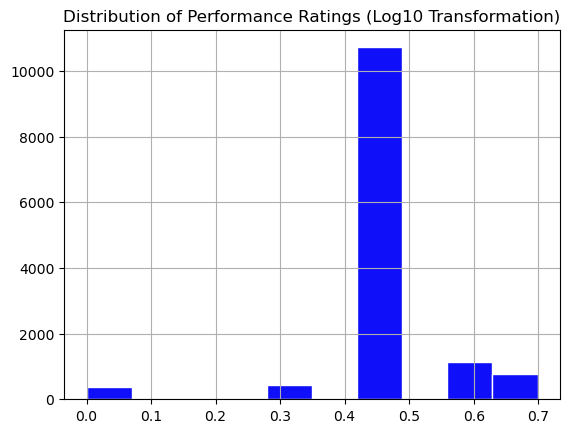

In [16]:
np.log10(df["PerformanceRating"]).hist(color = "#0F0FF9", edgecolor = "white") ### Using a log10 transoformation here which should help 
plt.title("Distribution of Performance Ratings (Log10 Transformation)"), 


nor(np.log10(df["PerformanceRating"])) 

The transformation certainly did not help, and in retrospect probably wasn't worth the time it took to try it. This is an unfortunate distribution, analytically speaking and in terms of the actual performance appraisals. 
The fact that such a small proportion of the employee population is above or below the mid-point suggests a couple factors might be at play here:
1. There are unclear evaluation guidelines. Managers are unsure how they can distinguish between an employee who "Meets Expectations" vs. ones who are "Above Expectations", for example. So, to avoid issues, the managers may be "playing it safe" and rating employees in the middle. 
2. Managers may have the correct guidence on how to distinguish but not know how to implement it. In other words, they may not feel comfortable explaining to their employees why they might be at a 1 or 2, so instead they just put them at a 3. 
3. Finally, it could be that performance appraisals are not taken too seriously at this company, that leaders just enter a middle-ground rating to satisfy the requirements of their roles, without much thought. 

To be clear, the issue here isn't necessarily the non-normality of the distribution. The issue is that this set of ratings is effectively all 3s with some outliers. If I want to use this as a potential indicator of training impact, I'll have to take a different approach. 


## A different approach

Given the issues with these ratings, my next best bet is probably stratification. 
Even though there's a common rating scale, there should be different levels of proficiency for each level of seniorty. e.g., Directors are likely evaluated against different standards than entry-level analysts, for example. I'll use the job level variable to see if I can get a more test-friendly sample. 

In [18]:
pd.DataFrame(df["JobLevel_updated"]).value_counts()

JobLevel_updated
L1                  5933
L2                  4432
L3                  1649
L4                   762
L5                   449
L6                   190
L7                     8
Name: count, dtype: int64


It looks like L1 + L2 employees represent almost 80% of the company, so I'll continue the analysis focusing on just these two employee groups which should hopefully limit some of the leptokurtosis . 


In [21]:
L12_df = df[(df["JobLevel_updated"] == "L1") | (df["JobLevel_updated"] == "L2")]
L12_df.describe()

,JobSatisfaction,JobInvolvement,PerformanceRating,TrainingTimesLastYear
count,10365.000000,10365.000000,10365.000000,10365.000000
mean,2.389098,2.466667,3.118090,2.465123
std,0.952448,0.666921,0.700351,1.083482
min,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000
50%,2.000000,3.000000,3.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,6.000000


(Text(0.5, 1.0, 'Distribution of Performance Ratings\n(L1 + L2 Employees Only)'),)

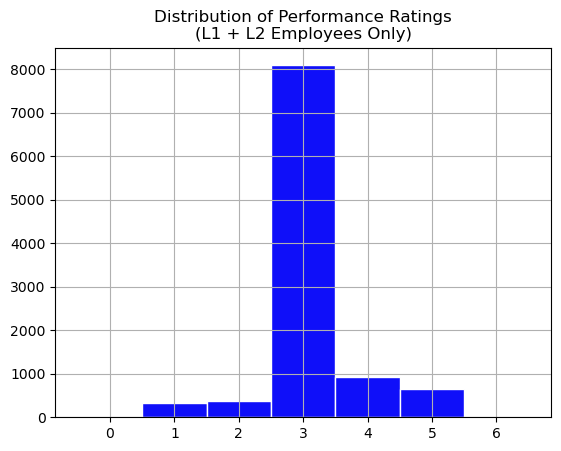

In [23]:
pr = L12_df["PerformanceRating"] #Creating a variable for this so that it's easier to call 

pr.hist(bins = bins, color = "#0F0FF9", edgecolor = "white")
plt.title("Distribution of Performance Ratings"+"\n"+"(L1 + L2 Employees Only)"), 

This is still a non-normal distribution. If I want to test for differences in performance ratings across training groups, I'll need to use a non-parametric test. the Mann–Whitney U test should do the trick as these are independent groups. But first, I want to see what the average ratings are across different levels of training. 



In [24]:
pd.DataFrame(L12_df["PerformanceRating"].groupby(L12_df["TrainingTimesLastYear"]).mean().round(2)) # Grouping but the number of training sessions attended. 

,PerformanceRating
TrainingTimesLastYear,
0,3.23
1,3.11
2,3.12
3,3.10
4,3.13
5,3.12
6,3.09


If trainings did impact ratings, I would expect to see an increase in average ratings as the number of trainings increase. But at first glance, the ratings across all training groups is very close. Interestingly, those with zero trainings have the highest average performance rating, though not by much. At this point, I can probably say that that training doesn't seem to improve performance. However, I'll still test for significance just to make sure that this take-away holds water.


In [25]:
l = []
for i in range(1, 7):

        a = L12_df[(L12_df["TrainingTimesLastYear"] == 0)]["PerformanceRating"] # Creating test variables
        b = df[(df["TrainingTimesLastYear"] == (i))]["PerformanceRating"]
        
        p = stats.mannwhitneyu(a, b).pvalue.round(3) # Simplifying and rounding test statistics 
        tstat = stats.mannwhitneyu(a, b).statistic.round(3)
        
    
        l.append(p)
        print("Employees with 0 Trainings have an average performance rating of", a.mean().round(2), "\n", 
              "vs Employees with", (i), "Training(s) who have an average of",b.mean().round(2),"\n", "Test Statistic:", tstat,"p-value:", p, "\n")



Employees with 0 Trainings have an average performance rating of 3.23 
 vs Employees with 1 Training(s) who have an average of 3.09 
 Test Statistic: 238156.0 p-value: 0.0 

Employees with 0 Trainings have an average performance rating of 3.23 
 vs Employees with 2 Training(s) who have an average of 3.12 
 Test Statistic: 1340512.0 p-value: 0.001 

Employees with 0 Trainings have an average performance rating of 3.23 
 vs Employees with 3 Training(s) who have an average of 3.09 
 Test Statistic: 770556.0 p-value: 0.0 

Employees with 0 Trainings have an average performance rating of 3.23 
 vs Employees with 4 Training(s) who have an average of 3.11 
 Test Statistic: 256315.5 p-value: 0.001 

Employees with 0 Trainings have an average performance rating of 3.23 
 vs Employees with 5 Training(s) who have an average of 3.11 
 Test Statistic: 120104.5 p-value: 0.003 

Employees with 0 Trainings have an average performance rating of 3.23 
 vs Employees with 6 Training(s) who have an average

Considering the sample size here, I'm not surprised that most of these came out with p<.01. In fact, the only one that was not significant was 0 vs 6, in which the latter had a sample size of 103. If I wanted to account for the differences in sample sizes, I would likely take equal sized random samples from the different groups and run the test several hundred times (using a loop, of course) to see how frequently I would get significant results. I don't think the juice would be worth the squeeze though. In fact, running the above tests was probably unnecessary. Even if I could get reliable significance, all it does is confirm the ~.1 difference in ratings across groups, which, by itself, probably doesn't justify the cost of the trainings.



So, that does it for hypothesis A, training does not appear to positively impact performance. 

# Engagement and Training


First up, I'm going to calculate an average of the two columns "JobSatisifaction" and "JobInvolvement". I want to do this because I don't think either one of these, by themselves, really represent engagement. An average of the two, however, would work as an "engagement index" of sorts.

In [26]:
df.head()

,JobSatisfaction,JobInvolvement,PerformanceRating,TrainingTimesLastYear,JobLevel_updated
0,3,3,4,2,L7
1,2,3,3,2,L6
2,4,2,4,4,L6
3,4,2,3,3,L7
4,2,2,4,2,L5


In [27]:
df["Eng"] = (df.iloc[:, 0]+df.iloc[:,1])/2

In [28]:
df.drop(["JobSatisfaction","JobInvolvement"], inplace = True, axis = 1)
df.reset_index(inplace = True, drop = True)

In [29]:
df.describe()

,PerformanceRating,TrainingTimesLastYear,Eng
count,13423.000000,13423.000000,13423.000000
mean,3.108247,2.454518,2.425687
std,0.667023,1.069622,0.581761
min,1.000000,0.000000,1.000000
25%,3.000000,2.000000,2.000000
50%,3.000000,2.000000,2.500000
75%,3.000000,3.000000,3.000000
max,5.000000,6.000000,4.000000


Text(0.5, 1.0, 'Distribution of Engagement')

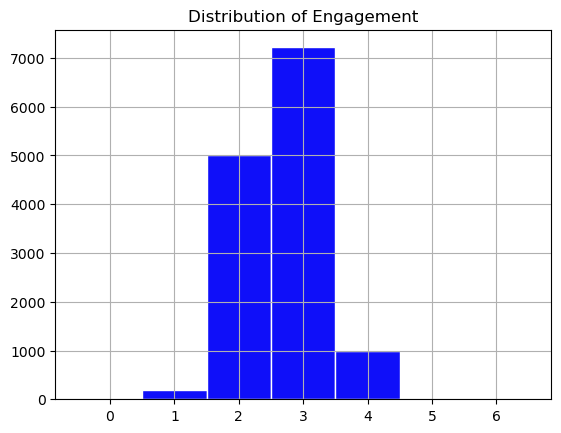

In [30]:
df["Eng"].hist(bins = bins, color = "#0F0FF9", edgecolor = "white")
plt.title("Distribution of Engagement")

In [31]:
nor(df["Eng"])

 p-value = 7.840383493426133e-36 
 This is a non-normal distribution


Not only are we seeing another leptokurtic distribution but also another reason to not limit a response scale to four points. This distribution, as well as the performance rating distribution for that matter, are the analytical equivalents of AC/DC's discography. There's not much variation, it's all pretty much "Thunderstruck", "Back in Black" and "TNT".

In a perfect world, we'd be working with something closer to Led Zeppelin, in which you still have a lot of "Communication Breakdown", "Black Dog" but there's still something for everyone, with variation in the form of songs like "The Rain Song" and "Fool in the Rain".

But that's okay, we can work with AC/DC. Now, there's really no need to segment the groups based on job level, as the engagement wouldn't be evaulated against different criteria across org. groups (at least not in any way that can be meaningfully measured). So, I'm going to just look at the average engagement scores across employees with different amounts of training.


In [32]:
df["Eng"].groupby(df["TrainingTimesLastYear"]).mean()

TrainingTimesLastYear
0    2.542670
1    2.366039
2    2.407535
3    2.441005
4    2.430050
5    2.493827
6    2.713592
Name: Eng, dtype: float64

In [33]:
df["TrainingTimesLastYear"].value_counts()

TrainingTimesLastYear
2    6370
3    3602
4    1208
1    1116
5     567
0     457
6     103
Name: count, dtype: int64

This is looking like a repeat of the performance rating tests. Those with 0 trainings appear to have the highest engagement, except for the group of employees who attended 6 trainings last year. Given that both the 0-training and 6-trainings groups combined make up less than .05% of the company population, it's safe to say that they aren't representative.

So, that does it for hypothesis B. Training does not appear to have a positive impact on employee engagement.

# Wrapping Up

In short, the trainings offered at this company aren't doing anyone any favors. 

In fact, I'd recommend an in-depth review of the company's approach to training. Are they mandatory or optional? How is the content selected? Are they delivered in-person or remote? All of these factors could determine the impact and ultimatley, the ROI of the training. Through some employee focus groups and surveys, the director of the training department could get some solid feedback on potential gaps in the training content and delivery. But as it currently stands, they're probably losing money on this training program.

Despite the slightly higher performance ratings and engagement scores for the 0-Trainings group, I don't think the trainings themseleves are so poor that they're hurting the performance and causing employees to become disengaged.

What may be happening here is the "0 Trainings" group is acting as a proxy indicator for newly hired. In other words, these could be new employees who have taken 0 trainings last year because they were not employed by the organization last year. 
If so, their slightly-higher-than-average performance ratings and engagement scores could be attributed to a "honeymoon period", in which they may be new to role. If so, then they're not only more engaged than their tenured collegues, but they're also motivated enough that they exceeded leader expectations for new hires' performance. 

There you have it, no need to stress to much about those trainings (unless you work with heavy machinery, please pay attention). So, next time you're stuck watching a training video so old that it refers to CDs as "technology of the future" feel free to grab a quick power nap or, if you're really board, check out some of [my other projects.](https://github.com/idawud91/Data-Analysis-Projects) 

